In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

survey_area = 0.11 # square degrees zfourge
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file)
data = data[data['Use'] == 1]

z = data['zpk']
mag_ab = 25 - 2.5*np.log10(data['FKs'])

plt.scatter(z, mag_ab, s=1)
plt.xlabel('Redshift')
plt.ylabel('Ks-band flux')
plt.show()

In [ ]:
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
y = np.array([16.5,17.6,18.9,20,21,21.5,22,22.5,23,23.5,24])

from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    y = a * np.log10(x/d + b) + c 
    return y

p0 = [7.8,2,13.7,0.3]
popt, pcov = curve_fit(func, x, y, p0=p0)
print(popt)

plt.scatter(z, mag_ab, s=1, label='Data points')
plt.scatter(x, y, color='green', label='Model points')
plt.plot(x, func(x, *popt), color='red', label='Max z')
plt.plot(np.linspace(0,8,100), func(np.linspace(0,8,100), *popt), color='red')
plt.xlabel('Redshift')
plt.ylabel('Ks-band flux')
plt.xlim(0,8)
plt.axhline(y=27, linestyle='--', color='black', label='Limiting magnitude')
plt.legend()
plt.show()

In [ ]:
z_max = 0.6 * ((10 ** ((mag_ab - 11.4) / 12.06)) - 2.6) # maximum redshift

mask_27 = mag_ab < 27

plt.scatter(z_max[mask_27], mag_ab[mask_27], s=1, label='$z_{max}$ Data points')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('Ks-band flux')
# plt.xlim(0,8)
plt.legend()
plt.show()

In [ ]:
# plot the number of galaxies across redshift
z_bins = np.linspace(0, 8, 33)
print(z_bins)

plt.hist(z, bins=z_bins, histtype='step', color='black', label='z')
plt.hist(z_max, bins=z_bins, histtype='step', color='red', label='z_max')
plt.ylabel('Number of galaxies')
plt.xlabel('Redshift')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file)
data = data[data['Use'] == 1]

z = data['zpk']
lum = data['FKs']
dists = cosmo.luminosity_distance(z) * 10 ** 6

mag_ab = 25 - 2.5*np.log10(lum) # AB apparent magnitude
mag_abs = mag_ab - 5 * np.log10(dists / 10) # absolute magnitude

plt.scatter(z, mag_abs, s=1, label='Data points')
plt.xlabel('Redshift')
plt.ylabel('Ks-band absolute magnitude')
plt.gca().invert_yaxis()
plt.margins(x=0)
# plt.axhline(y=-25, linestyle='--', color='black', label='Limiting magnitude')
plt.legend()
plt.show()

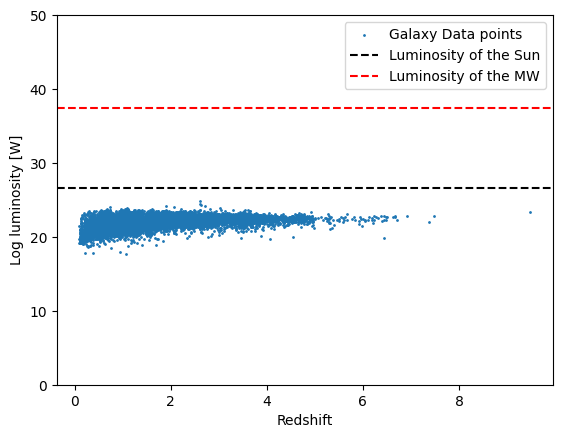

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file) # 30,911 galaxies
data = data[data['Use'] == 1] # 13,299 galaxies
data = data[data['FKs'] > 0] # 12,676 galaxies # drop rows if FKs is negative

def fluxtolum(z, fl):
    """Converts flux density [uJy] to  luminosity [erg/s]"""
    # print ' fl is assumed to be in uJy'
    ld = cosmo.luminosity_distance(z)  # ld[Mpc]
    ld *= (3.086 * 10 ** 22)  # ld[m]
    flsi = fl * 1e-32  # [W/m^2/Hz]
    lum = (4 * np.pi * ld ** 2) * flsi / (1 + z)  # W
    return lum



z = data['zpk']
flux = data['FKs'] # Units? uJy or AB magnitude?

# flux = 10 ** ((25 - flux) / 2.5)  # AB magnitude -> uJy or Jy?
# flux = flux * 10 ** 6 # Jy -> uJy

lum = fluxtolum(z, flux) # luminosity [W]
lum = np.log10(lum)

plt.scatter(z, lum, s=1, label='Galaxy Data points')
plt.xlabel('Redshift')
plt.ylabel('Log luminosity [W]')
plt.axhline(y=np.log10(3.83*10**26), linestyle='--', color='black', label='Luminosity of the Sun')
plt.axhline(y=np.log10(2.6*10**37), linestyle='--', color='red', label='Luminosity of the MW')
plt.ylim(0, 50)
plt.legend()